In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("../data/Library_Usage.csv", 
    na_values="none")
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
0,1,Juvenile,0,0,0 to 9 years,r3,Richmond,NaN,NaN,z,Email,True,2022,True
1,2,Teen,0,0,10 to 19 years,x,Main,NaN,NaN,z,Email,True,2022,True
2,0,Adult,0,0,35 to 44 years,m4,Merced,NaN,NaN,z,Email,True,2019,True
3,2,Teen,0,0,10 to 19 years,x,Main,NaN,NaN,z,Email,True,2021,True
4,2,Teen,0,0,10 to 19 years,b2,Bayview,NaN,NaN,z,Email,True,2013,True


Meine Fragen:
1. Räumliche Verteilung der Home-Library-Definition (oder Code) auf einer Landkarte des SF-County, 
    inkl. Within SF County: (true/false)
2. Verteilung Notice (Email/Phone/Print/None) zu Year Patron Registered und Altersgruppe.
3. Zusammenhang Altersgruppe, Ausleihzahlen und Herkunft.
4. Wohnort Kinder und Senioren.
5. Menge der Ausleihen an Lehrer, Staff (statistische Verteilungen) gegenüber Adults.
6. Bevölkerungsstatistiken SF (extern) korrelieren.
7. Provided Email zu Notice (wer hat zwar, will aber nicht) inkl. Altersgruppe?

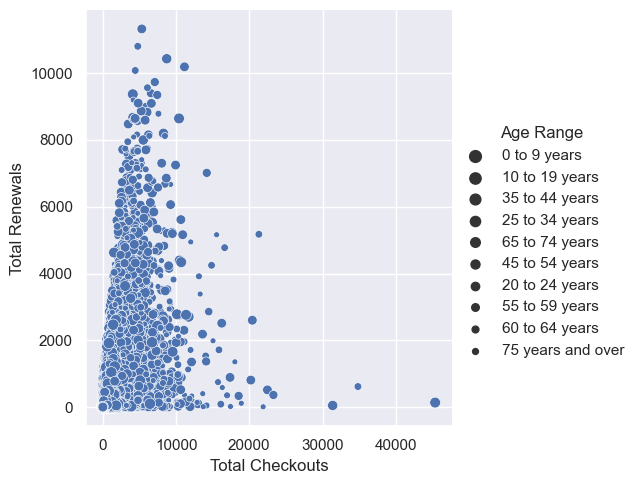

In [12]:
sns.relplot(x="Total Checkouts", y="Total Renewals", size="Age Range", data=df)
plt.show()

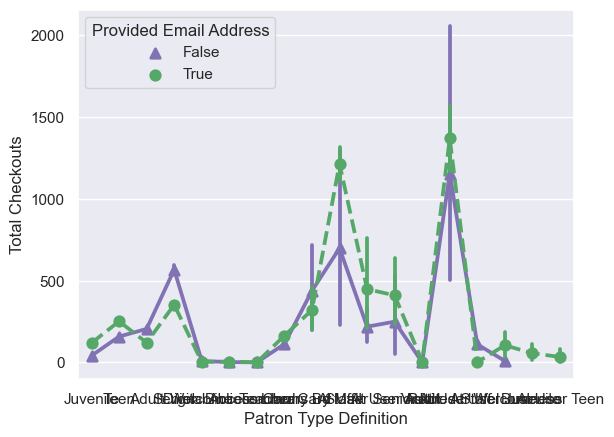

In [20]:
sns.pointplot(x="Patron Type Definition",
                  y="Total Checkouts",
hue="Provided Email Address",
data=df,
palette={True:"g",
         False:"m"},
markers=["^","o"],
linestyles=["-","--"])
plt.show()

In [23]:
df_staff = df.loc[df['Patron Type Definition']=='Staff']
df_teen = df.loc[df['Patron Type Definition']=='Teen']
df_adult = df.loc[df['Patron Type Definition']=='Adult']

In [26]:
df_teen.mean()

/var/folders/z6/w9xj39b12pb0js3m_zzfqgkh0000gn/T/ipykernel_56877/545237060.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_teen.mean()


Patron Type Code                  2.000000
Total Checkouts                 235.112246
Total Renewals                   69.593778
Circulation Active Year        2020.910051
Provided Email Address            0.830045
Year Patron Registered         2014.424641
Within San Francisco County       0.900273
dtype: float64

In [25]:
df.loc[df['Patron Type Definition']=='Adult'].mean()

/var/folders/z6/w9xj39b12pb0js3m_zzfqgkh0000gn/T/ipykernel_56877/3741721669.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.loc[df['Patron Type Definition']=='Adult'].mean()


Patron Type Code                  0.000000
Total Checkouts                 125.744945
Total Renewals                   68.161053
Circulation Active Year        2021.758615
Provided Email Address            0.938513
Year Patron Registered         2015.061306
Within San Francisco County       0.825916
dtype: float64

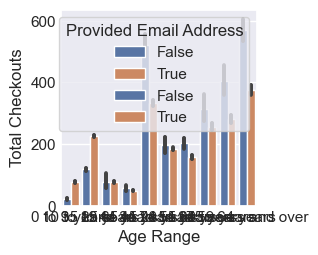

In [36]:
plt.style.use('_mpl-gallery')

sns.barplot(x="Age Range",
               y="Total Checkouts",
                hue="Provided Email Address",
data=df)

plt.show()

In [29]:
df_staff

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
4091,5,Staff,0,0,NaN,b2,Bayview,NaN,NaN,z,Email,True,2022,True
13821,5,Staff,0,0,NaN,m8,Mission Bay,NaN,NaN,z,Email,True,2019,True
28457,5,Staff,0,0,NaN,x,Main,NaN,NaN,z,Email,True,2003,True
39935,5,Staff,0,0,NaN,x,Main,NaN,NaN,z,Email,True,2007,True
40608,5,Staff,4204,4584,NaN,p7,Potrero,January,2023.0,z,Email,True,2003,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435586,5,Staff,178,76,55 to 59 years,c2,Chinatown,November,2014.0,z,Email,True,2003,True
435674,5,Staff,279,136,45 to 54 years,x,Main,September,2014.0,z,Email,True,2003,True
436429,5,Staff,16,0,45 to 54 years,c2,Chinatown,January,2013.0,z,Email,True,2011,True
436533,5,Staff,102,55,NaN,yb,Bookmobile,October,2012.0,z,Email,True,2007,True


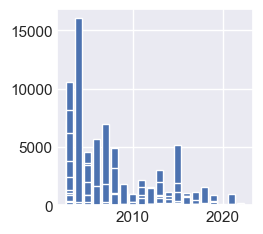

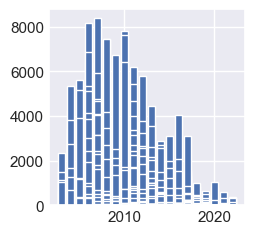

In [48]:
import matplotlib.pyplot as plt
import numpy as np

#plt.style.use('_mpl-gallery')

# make the data
np.random.seed(3)
y = df_staff['Total Checkouts']
x = df_staff['Year Patron Registered']
a = df_teen['Total Checkouts']
z = df_teen['Year Patron Registered']

# plot
fig, ax = plt.subplots()
fig, bx = plt.subplots()

ax.bar(x, y)
bx.bar(z, a)

plt.show()

In [76]:
df_age = df['Age Range'].value_counts()
df_age = pd.DataFrame(df_age)
df_age = df_age.sort_values(by='Age Range')
df_age

,Age Range
60 to 64 years,17664
75 years and over,18872
55 to 59 years,19281
20 to 24 years,24484
65 to 74 years,31906
0 to 9 years,34642
45 to 54 years,48752
10 to 19 years,67320
35 to 44 years,80477
25 to 34 years,92790


In [37]:
import pandas as pd

df = pd.read_csv(
    "../data/Library_Usage.csv", 
    na_values="none"
)
pd.crosstab(
    df['Home Library Definition'],
    df['Year Patron Registered'],
    margins=True
)

Year Patron Registered,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,All
Home Library Definition,,,,,,,,,,,,,,,,,,,,,
Anza,1194,116,118,166,164,354,209,131,284,314,...,346,445,396,500,611,1007,345,509,948,8477
Bayview,426,61,91,81,101,227,182,211,185,167,...,436,486,455,685,463,780,216,207,633,6594
Bernal,1141,152,121,131,179,195,185,547,394,382,...,476,591,585,1046,813,1391,405,596,1189,10882
Bookmobile,126,13,15,17,11,26,34,40,37,61,...,60,97,101,249,178,396,98,133,340,2097
Chinatown,2033,208,217,260,260,431,416,419,499,500,...,552,733,643,971,924,1362,305,485,1074,12759
Eureka Valley,1448,156,163,175,215,212,330,378,369,427,...,488,562,528,896,953,1807,575,752,1373,12190
Excelsior,1694,115,234,304,289,484,525,534,577,643,...,687,776,713,1342,930,1588,521,590,965,14141
Glen Park,1351,146,155,151,267,377,381,347,314,317,...,393,507,452,548,468,760,163,259,615,8294
Golden Gate,564,54,70,80,77,138,148,87,163,207,...,266,311,358,506,531,1041,300,459,1051,6591


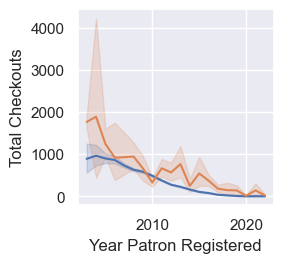

In [64]:
sns.lineplot(x="Year Patron Registered", y="Total Checkouts", 
              data=df_teen)
sns.lineplot(x="Year Patron Registered", y="Total Checkouts", 
            data=df_staff)
plt.show()